# Christopher Massonet
# Machine Learning
# CS379-2301B-01
# Individual Project 2

### Goal
We will be using a dataset consisting of variables pertaining to houses being sold. With this data, we will train our program to predict the sale price of said houses.

### Checklist
- Understand the data
- Import necessary modules
- Preprocess the data
- Create data visualizations
- Drop unnecessary columns
- Normalize data
- Map data to numerical values and ranges
- Drop excess rows if necessary
- Split our data into testing and training groups
- Predict house prices within their ranges

### Hypotheses to Test
- Number of bedrooms affecting price
- Garage area affecting price
- Year built affecting price
- Overall condition affecting price

First off, we import our necessary modules as always. Seaborn and matplotlib will help us to visualize data and prove our hypotheses. We will use the GradientBoostingRegressor and RandomForestRegressor models for this dataset. As such, we also need r2_score for the accuracy scores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor



We will now read in our data and do some initial visualization. 
### Make sure that you have a Data folder containing the test.csv and train.csv files in the same folder as your Housing Prices.ipynb file.

In [2]:
data = pd.read_csv('./Data/train.csv')
data = data.fillna(0)
pd.set_option('display.max_columns', None)
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Below, we will test our hypotheses by plotting them, comparing their different values and how they relate to the sale price.

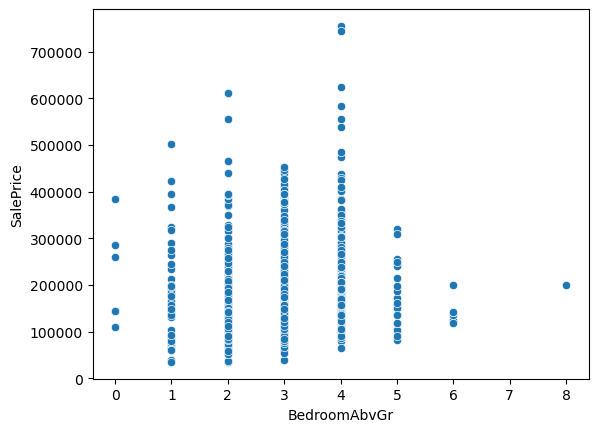

In [3]:
sns.scatterplot(data=data, x='BedroomAbvGr', y='SalePrice')
plt.show()

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

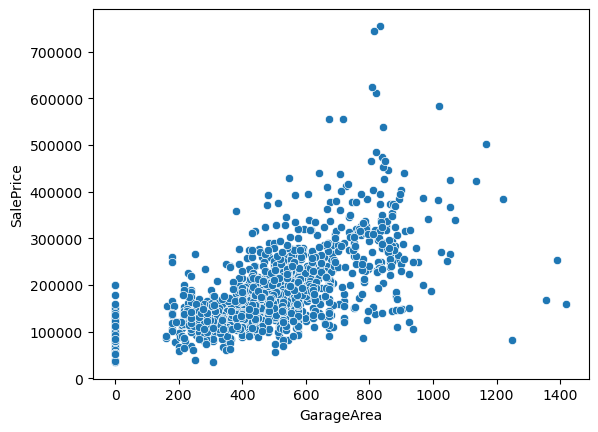

In [4]:
sns.scatterplot(data=data, x='GarageArea', y='SalePrice')

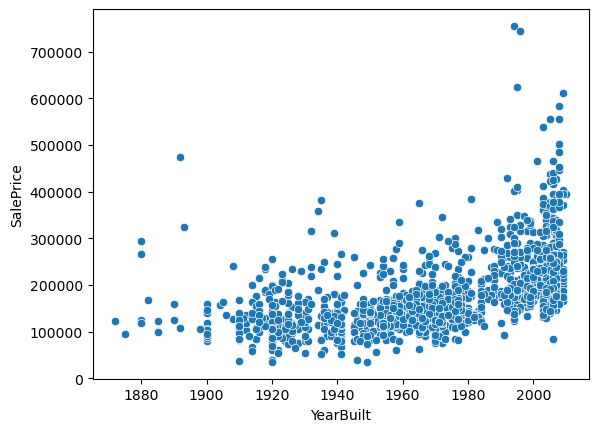

In [5]:
sns.scatterplot(data=data, x='YearBuilt', y='SalePrice')
plt.show()

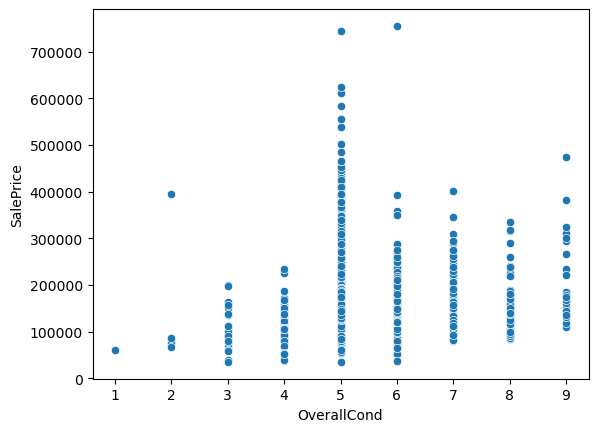

In [6]:
sns.scatterplot(data=data, x='OverallCond', y='SalePrice')
plt.show()

From our comparisons above, we can conclude that overall condition and the year built have some of the biggest effects on the sale price. Strangely enough, the lot area and number of bedrooms did not have much an effect on the sale price.

Now, we will start normalizing our data to be used by our training model. We will use the label encoder to normalize every column of data except for our sale price. We start by iterating through every column, making sure that it is not our sale price column, changing its data to strings, then using label encoder to transform it into something we can use.

In [7]:
le = LabelEncoder()
for column in data.columns:
    if column != 'SalePrice':
        data[column] = data[column].astype(str)
        data[column] = le.fit_transform(data[column])

Here, we will split up our data to test and train our model. 

In [8]:
x = data.drop('SalePrice', axis=1)
y = data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

Now, we are setting up our two different training models. We are using Gradient Boosting and Random Forest to test our training and testing datasets.

In [9]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
gb_pred = gb_model.predict(x_test)
gb_accuracy = r2_score(y_test, gb_pred)
print('Accuracy:', gb_accuracy)

Accuracy: 0.8549100266318674


In [10]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_accuracy = r2_score(y_test, rf_pred)
print('Accuracy:', rf_accuracy)

Accuracy: 0.8327285845723282


As we can see above, these models returned predictions with an accuracy of about 85% and 83% respectively. With this, we should be able to confidently appraise house values based on the same criteria that we fed it before. Now, we can move on to predicting the test data's sale prices. To start off, we'll import and read it just like we did our training data. We can now make a function to import the file and perform all of the preprocessing on it to increase reusability.

In [15]:
def new_data(filename):
    if isinstance(filename, str) == True:
        test = pd.read_csv('./Data/' + filename)
        test = test.fillna(0)
        for column in test.columns:
            test[column] = test[column].astype(str)
            test[column] = le.fit_transform(test[column])
        return(test)

Now, we import our test dataset using our newdata function. Then, we'll use the describe method to see if it properly imported.

In [16]:
test = new_data('test.csv')
test.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,729.000000,7.113777,4.015764,63.495545,575.376971,0.995888,0.098698,1.952707,2.776559,0.998629,3.092529,0.045236,12.623029,2.049349,1.995888,0.518163,2.638794,5.997258,4.553804,67.130912,33.662783,1.382454,0.015764,9.333790,10.708019,2.738862,53.248115,2.521590,3.68403,1.389993,3.119945,3.67512,3.193968,3.677176,238.858807,5.485949,9.689513,378.734064,394.822481,0.013023,1.529130,0.930775,2.771761,409.664839,91.540781,0.071967,410.969842,0.433859,0.065113,1.570939,0.377656,2.854010,1.042495,3.351611,7.940370,6.760795,0.58122,1.845099,3.117204,60.553119,2.069911,1.764907,190.621659,3.614805,4.636737,1.805346,46.455106,66.737491,11.257711,0.055517,3.372173,0.014393,0.002742,0.476354,0.099383,0.466073,6.525017,1.769705,8.463331,3.787526
std,421.321334,3.743775,0.715610,35.352164,324.698865,0.064018,0.373861,1.410751,0.701340,0.037012,1.585797,0.217566,5.897889,0.879755,0.143385,1.214981,1.479778,1.471725,1.113740,28.943443,21.130467,0.806605,0.158520,2.438045,3.145055,0.662283,85.707706,0.710527,0.81285,0.731936,1.050837,0.95438,1.234536,1.880327,224.076937,1.411899,30.358967,237.442637,234.968438,0.154388,1.746152,0.253924,0.771134,247.373400,128.410896,0.831250,260.037510,0.530527,0.252307,0.555190,0.503017,0.829788,0.208472,0.843202,1.917684,0.923522,0.64742,2.008725,1.894863,28.127534,0.943125,0.777056,119.499095,1.097922,1.215884,0.574204,70.707874,73.028211,29.807005,0.670004,11.959491,0.249413,0.064091,1.022361,0.530671,2.708908,2.999067,1.301740,1.649040,1.055436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

We can see that we have all of the same columns minus the sale price column in our dataset. Now we can use it with our previously trained model to predict the sale price. Since the gradient booster had the higher accuracy, we will use that instead of the random forest model.

In [17]:
new_pred = gb_model.predict(test)
test['SalePricePrediction'] = new_pred
test.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePrediction
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,729.000000,7.113777,4.015764,63.495545,575.376971,0.995888,0.098698,1.952707,2.776559,0.998629,3.092529,0.045236,12.623029,2.049349,1.995888,0.518163,2.638794,5.997258,4.553804,67.130912,33.662783,1.382454,0.015764,9.333790,10.708019,2.738862,53.248115,2.521590,3.68403,1.389993,3.119945,3.67512,3.193968,3.677176,238.858807,5.485949,9.689513,378.734064,394.822481,0.013023,1.529130,0.930775,2.771761,409.664839,91.540781,0.071967,410.969842,0.433859,0.065113,1.570939,0.377656,2.854010,1.042495,3.351611,7.940370,6.760795,0.58122,1.845099,3.117204,60.553119,2.069911,1.764907,190.621659,3.614805,4.636737,1.805346,46.455106,66.737491,11.257711,0.055517,3.372173,0.014393,0.002742,0.476354,0.099383,0.466073,6.525017,1.769705,8.463331,3.787526,175818.127348
std,421.321334,3.743775,0.715610,35.352164,324.698865,0.064018,0.373861,1.410751,0.701340,0.037012,1.585797,0.217566,5.897889,0.879755,0.143385,1.214981,1.479778,1.471725,1.113740,28.943443,21.130467,0.806605,0.158520,2.438045,3.145055,0.662283,85.707706,0.710527,0.81285,0.731936,1.050837,0.95438,1.234536,1.880327,224.076937,1.411899,30.358967,237.442637,234.968438,0.154388,1.746152,0.253924,0.771134,247.373400,128.410896,0.831250,260.037510,0.530527,0.252307,0.555190,0.503017,0.829788,0.208472,0.843202,1.917684,0.923522,0.64742,2.008725,1.894863,28.127534,0.943125,0.777056,119.499095,1.097922,1.215884,0.574204,70.707874,73.028211,29.807005,0.670004,11.959491,0.249413,0.064091,1.022361,0.530671,2.708908,2.999067,1.301740,1.649040,1.055436,74250.136494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Now, we have a new dataset containing everything passed into our function, but now it also has a SalePricePrediction column at the end. From here we can export a new csv file with the predicted sale price if we so choose.